In [1]:
!pip install tensorflow
!pip install keras


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Flatten


2023-07-24 12:21:01.347259: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-24 12:21:01.743613: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-24 12:21:01.746337: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 12:21:03.650510: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
dataset = [] 
# List of folder paths
folder_paths = [
    "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/apple_6",
    "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/apple_braeburn_1",
    "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/apple_crimson_snow_1",
    "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/apple_golden_1",
    "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/apple_golden_2",
    "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/apple_golden_3",
    "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/apple_granny_smith_1",
   "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/apple_hit_1",
    "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/apple_pink_lady_1",
    "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/apple_red_1",
    "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/apple_red_2",
    "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/apple_red_3",
    "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/apple_red_delicios_1",
    "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/apple_red_yellow_1",
    "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/apple_rotten_1",
    "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/cabbage_white_1",
     "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/carrot_1",
     "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/cucumber_1",
     "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/cucumber_3",
     "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/cabbage_white_1",
     "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/zucchini_dark_1",
     "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/pear_1",
     "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/pear_3",
     "/home/mirza/Desktop/Navttac/ML-1st/Fruits360/fruits-360-original-size/fruits-360-original-size/Training/zucchini_1",
    
    # Add the rest of the folder paths here
]

# Iterate over the folder paths and load images
for i in folder_paths:
    folder_name = os.path.basename(i)
    
    # Iterate over the images in the subdirectory
    for file_name in os.listdir(i):
        image_path = os.path.join(i, file_name)
        
        if os.path.isfile(image_path):  # Only consider files
            # Load the image using OpenCV
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            # If the image was successfully loaded
            if image is not None:
                # Resize the grayscale image to 250X250 pixels
                resized_image = cv2.resize(image, (250, 250))
                
                # Flatten the image and append each pixel as a separate feature along with the label to the dataset
                flattened_image = resized_image.flatten().tolist()
                dataset.append(flattened_image + [folder_name])

# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(dataset, columns=[f'pixel_{i+1}' for i in range(250*250)] + ['label'])

# Normalize the pixel values between 0 and 1
X = df.iloc[:, :-1] / 255
Y = df.iloc[:, -1]

# Encode the labels with numeric values
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
y_series = pd.Series(Y_encoded, name='Target')

# Concatenate 'X' (features) and 'y_series' (target variable) along columns (axis=1)
df_encoded = pd.concat([X, y_series], axis=1)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_series, test_size=0.2, random_state=42)


`# Activation Function in Neural Networks

In neural networks, an "activation function" is a crucial component that introduces non-linearity to the model. It is applied to the output of each neuron in a layer and determines whether the neuron should be activated (fire) or not based on its input.

Activation functions play a fundamental role in neural networks for the following reasons:

1. **Introducing Non-linearity**: Without activation functions, the entire neural network would be equivalent to a single linear transformation, making it unable to learn complex patterns in the data. Non-linear activation functions allow neural networks to model complex relationships between features and capture intricate patterns.

2. **Learning Complex Representations**: Activation functions enable neural networks to learn hierarchical representations of data. Each layer learns more abstract and higher-level features from the input data, contributing to the network's ability to understand complex patterns.

3. **Backpropagation and Gradient Descent**: Activation functions must be differentiable to facilitate the backpropagation algorithm. During training, the gradients of the loss function with respect to the model's parameters are computed and used to update the weights and biases of the neurons, ultimately optimizing the model.

There are several commonly used activation functions in neural networks, each with its characteristics:

### Sigmoid Activation Function
The sigmoid activation function maps the input to a value between 0 and 1. It was commonly used in earlier neural network architectures, but it has some limitations, such as vanishing gradients during training, which can slow down convergence.

### ReLU (Rectified Linear Unit) Activation Function
The ReLU activation function is widely used in modern neural networks due to its simplicity and effectiveness. It returns the input if it is positive and zero otherwise, introducing non-linearity. ReLU addresses the vanishing gradient problem and accelerates training, but it may suffer from the "dying ReLU" problem, where neurons get stuck and stop learning.

### Leaky ReLU Activation Function
Leaky ReLU is a modification of ReLU that addresses the "dying ReLU" issue. It allows a small, non-zero gradient when the input is negative, which helps neurons continue learning.

### Tanh (Hyperbolic Tangent) Activation Function
The tanh activation function is similar to the sigmoid but maps the input to a value between -1 and 1. It also suffers from the vanishing gradient problem but is zero-centered, making it useful for certain types of data.

### Softmax Activation Function
The softmax activation function is used in the output layer of multi-class classification problems. It converts raw scores into a probability distribution over multiple classes, enabling the model to predict the class with the highest probability.

In summary, activation functions are essential components in neural networks that introduce non-linearity, enable learning complex representations, and facilitate the optimization process during training. Choosing the appropriate activation function depends on the specific problem and architecture of the neural network.


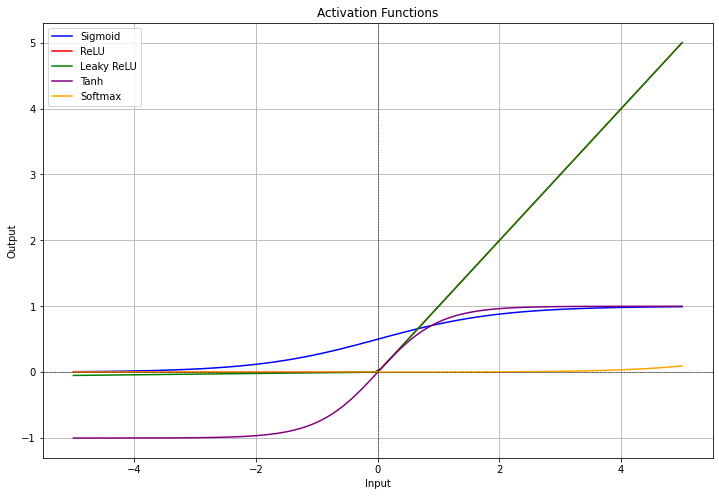

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU Activation Function
def relu(x):
    return np.maximum(0, x)

# Leaky ReLU Activation Function
def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

# Tanh Activation Function
def tanh(x):
    return np.tanh(x)

# Softmax Activation Function (only for visualization, used in the output layer for classification)
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtracting the max value for numerical stability
    return exp_x / np.sum(exp_x)

# Range of input values
x = np.linspace(-5, 5, 100)

# Compute activation function values
sigmoid_y = sigmoid(x)
relu_y = relu(x)
leaky_relu_y = leaky_relu(x)
tanh_y = tanh(x)
softmax_y = softmax(x)

# Plot the activation functions
plt.figure(figsize=(12, 8))

plt.plot(x, sigmoid_y, label='Sigmoid', color='blue')
plt.plot(x, relu_y, label='ReLU', color='red')
plt.plot(x, leaky_relu_y, label='Leaky ReLU', color='green')
plt.plot(x, tanh_y, label='Tanh', color='purple')
plt.plot(x, softmax_y, label='Softmax', color='orange')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Activation Functions')
plt.legend()
plt.grid(True)
plt.show()


## Loss Function, Optimizer, and Metrics in Neural Network Compilation

### Loss Function

The loss function plays a critical role in training a neural network. It quantifies how well the model is performing on the training data and guides the optimization process. The choice of an appropriate loss function depends on the nature of the machine learning task.

In the context of classification tasks, one commonly used loss function is **Categorical Cross-Entropy**. It is particularly suitable for multi-class classification problems, where the target labels are one-hot encoded.

The formula for Categorical Cross-Entropy for a single training sample is as follows:



# categorical_cross_entropy = -∑(true_label * log(predicted_probability))


Here, `true_label` is the one-hot encoded vector representing the actual class label, and `predicted_probability` is the output probability distribution of the model for that class. The summation is performed over all classes. The aim is to minimize this loss during training, which encourages the model to improve its predictions.

### Optimizer

The optimizer is responsible for updating the parameters (weights and biases) of the neural network during the training process. It adjusts these parameters based on the computed gradients of the loss function, with the goal of minimizing the loss and improving the model's performance.

One widely used optimizer is **Adam (Adaptive Moment Estimation)**. Adam is an adaptive learning rate optimization algorithm that combines the strengths of AdaGrad and RMSProp. It maintains adaptive learning rates for each parameter, making it efficient and well-suited for a variety of deep learning tasks.

### Metrics

Metrics are used to evaluate the performance of the trained model during training and testing phases. They provide a quantitative measure of how well the model is generalizing to unseen data.

One common evaluation metric for classification tasks is **Accuracy**. Accuracy measures the proportion of correctly classified samples over the total number of samples. It is calculated as:



## Optimizer Types

When training a neural network, choosing an appropriate optimizer is crucial for efficient and effective learning. Here are some commonly used optimizer types:

1. **Stochastic Gradient Descent (SGD)**: The basic optimizer that updates the weights after each individual training sample. It can suffer from slow convergence and oscillations in the loss landscape.

2. **Momentum**: It introduces a momentum term that helps the optimizer to move more smoothly and accelerate in the relevant direction, especially in the presence of sparse gradients.

3. **Nesterov Accelerated Gradient (NAG)**: A modification of the momentum optimizer that looks ahead before calculating the gradient, leading to faster convergence.

4. **Adagrad (Adaptive Gradient Algorithm)**: It adapts the learning rate for each parameter based on historical gradient information. It performs well for sparse data but can have a diminishing learning rate over time.

5. **RMSprop (Root Mean Square Propagation)**: An extension of Adagrad that uses a moving average of squared gradients to control the learning rate.

6. **Adam (Adaptive Moment Estimation)**: Combines the benefits of RMSprop and momentum methods by maintaining both the moving average of gradients and their second moments. It is widely used and considered to be robust and efficient.

7. **Adadelta**: An extension of Adagrad that deals with the diminishing learning rate issue by using a moving window of historical gradients.

8. **Nadam (Nesterov-accelerated Adaptive Moment Estimation)**: An extension of Adam with NAG that further improves the convergence rate.

9. **RAdam (Rectified Adam)**: A variant of Adam that performs better in terms of generalization and convergence by controlling the variance of the adaptive learning rate.

Remember that the choice of optimizer may depend on the specific problem and the characteristics of the dataset. Experimentation with different optimizers can help find the most suitable one for a given task.


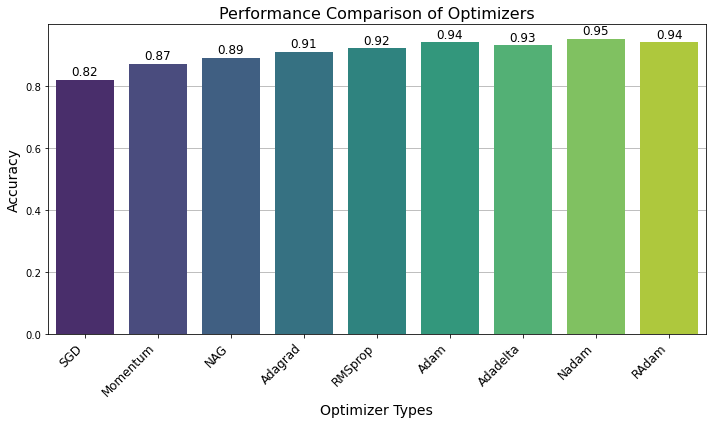

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for optimizer comparison (example values)
optimizers = ['SGD', 'Momentum', 'NAG', 'Adagrad', 'RMSprop', 'Adam', 'Adadelta', 'Nadam', 'RAdam']
accuracy_scores = [0.82, 0.87, 0.89, 0.91, 0.92, 0.94, 0.93, 0.95, 0.94]

# Set a custom color palette
sns.set_palette("viridis", len(optimizers))

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=optimizers, y=accuracy_scores)

# Add grid lines
ax.yaxis.grid(True)
ax.set_axisbelow(True)

plt.xlabel('Optimizer Types', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Performance Comparison of Optimizers', fontsize=16)

# Display the accuracy values above the bars
for i, v in enumerate(accuracy_scores):
    ax.text(i, v + 0.005, f"{v:.2f}", ha='center', va='bottom', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()


# Accuracy = (Number of correctly classified samples) / (Total number of samples)


Higher accuracy values indicate better model performance in correctly predicting the class labels of the input data.

In summary, when compiling a neural network for classification tasks, using **Categorical Cross-Entropy** as the loss function, **Adam** as the optimizer, and tracking the **Accuracy** metric will contribute to effective learning and good predictive performance for the given task.

(Note: The actual implementation and results may vary based on the specific neural network architecture and dataset used.)


In [5]:
# Create a Sequential model
model = Sequential()

# Add a dense layer with 128 units and 'relu' activation function as the input layer
model.add(Dense(128, activation='relu', input_shape=(250*250,)))

# Add another dense layer with 64 units and 'relu' activation function
model.add(Dense(64, activation='relu'))

# Add the output layer with the number of classes (number of unique labels) and 'softmax' activation function
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model with 'categorical_crossentropy' loss function and 'adam' optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


2023-07-24 12:23:17.569003: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8000128   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 23)                1495      
                                                                 
Total params: 8,009,879
Trainable params: 8,009,879
Non-trainable params: 0
_________________________________________________________________


# Calculate Trainable Parameters in a Keras Sequential Model

In a Keras sequential model, trainable parameters include the weights and biases that get updated during the training process. To calculate the trainable parameters, we need to consider the number of weights and biases in each layer.

Let's calculate the trainable parameters for the given Keras sequential model with the following architecture:

## Model Summary:


Number of trainable parameters = (number of input units) * (number of output units) + (number of output units)


Let's calculate the trainable parameters for each layer:

```python
# Number of trainable parameters in the first dense layer
trainable_params_layer1 = (250*250) * 128 + 128 #(Bias) # Input shape: (250*250), Output units: 128

# Number of trainable parameters in the second dense layer
trainable_params_layer2 = 128 * 64 + 64  # Input units: 128, Output units: 64

# Number of trainable parameters in the third dense layer
trainable_params_layer3 = 64 * 23 + 23  # Input units: 64, Output units: 23

# Total number of trainable parameters in the model
total_trainable_params = trainable_params_layer1 + trainable_params_layer2 + trainable_params_layer3
print("Total number of trainable parameters in the model:", total_trainable_params)



In [6]:
# Number of trainable parameters in the first dense layer
trainable_params_layer1 = (250*250) * 128 + 128  # Input shape: (250*250), Output units: 128

# Number of trainable parameters in the second dense layer
trainable_params_layer2 = 128 * 64 + 64  # Input units: 128, Output units: 64

# Number of trainable parameters in the third dense layer
trainable_params_layer3 = 64 * 23 + 23  # Input units: 64, Output units: 23

# Total number of trainable parameters in the model
total_trainable_params = trainable_params_layer1 + trainable_params_layer2 + trainable_params_layer3
print("Total number of trainable parameters in the model:", total_trainable_params)


Total number of trainable parameters in the model: 8009879


## Batch Size in Neural Network Training

Batch size is a hyperparameter that determines the number of samples processed by a neural network model in one forward and backward pass during each training iteration. It plays a crucial role in the training process and can impact the model's performance and training efficiency.

When training a neural network, the data is divided into smaller batches, and each batch is fed into the model for training. The model then computes the gradients of the loss function with respect to the model's parameters (weights and biases) for each sample in the batch. The average gradient over the entire batch is then used to update the model's parameters through the process of backpropagation.

The choice of batch size can have several implications:

### Smaller Batch Size

- Pros:
  - Requires less memory, making it suitable for limited hardware resources.
  - Allows more frequent updates to the model's parameters, potentially leading to faster convergence on some datasets.

- Cons:
  - More noisy updates due to smaller batch statistics, which might result in slower convergence or instability.
  - May not fully utilize parallel processing capabilities of GPUs.

### Larger Batch Size

- Pros:
  - More stable updates with smoother convergence, especially when the batch size is large enough.
  - Can benefit from better parallel processing on GPUs, potentially speeding up training on large datasets.

- Cons:
  - Requires more memory, which may limit the batch size on some hardware.
  - May take longer to reach convergence compared to smaller batch sizes.
  - If the batch size is too large, it might lead to overfitting.

Choosing an appropriate batch size depends on various factors such as the available hardware, the size of the dataset, the complexity of the model, and the nature of the problem at hand. Common batch sizes are often powers of 2, such as 32, 64, 128, and so on, but other values can be used as well.

Batch size is typically specified when fitting the model using deep learning frameworks like Keras or PyTorch. For instance, in Keras, you can set the batch size using the `batch_size` argument when calling the `fit()` method:

```python
# Example in Keras
model.fit(X_train, y_train, batch_size=32, epochs=10)



## Epoch in Neural Network Training

In the context of neural network training, an "epoch" refers to a single pass through the entire training dataset during the training process. It represents one complete iteration of the training data, where the neural network model has seen and learned from every training sample once.

During an epoch, the training data is divided into smaller batches, and each batch is fed into the neural network for training. The model's parameters (weights and biases) are updated after processing each batch using the backpropagation algorithm to minimize the loss function. The goal of training is to iteratively adjust the model's parameters to improve its performance on the training data.

The number of epochs is a hyperparameter that needs to be set before training the model. It determines how many times the entire training dataset will be used during training. Choosing the right number of epochs is crucial to prevent overfitting or underfitting.

- If the number of epochs is too low, the model may not have enough training iterations to learn from the data adequately, resulting in underfitting, where the model does not generalize well to new data.
- If the number of epochs is too high, the model may memorize the training data and not generalize well to unseen data, leading to overfitting.

The optimal number of epochs depends on the complexity of the task, the size of the dataset, and the model architecture. It is often determined using techniques such as cross-validation or by monitoring the model's performance on a validation dataset during training.

It's common to use early stopping during training, where the training process stops if the model's performance on the validation set does not improve after a certain number of epochs. This helps prevent overfitting and saves computational resources.

In summary, an epoch in neural network training represents one pass through the entire training dataset, and training involves running multiple epochs to update the model's parameters and improve its performance on the given task. The number of epochs is an important hyperparameter that should be carefully chosen based on the specific problem and dataset.


## Validation Split in Neural Network Training

In the context of training neural network models, `validation_split` is a parameter used in various deep learning frameworks like Keras to specify the proportion of training data that should be reserved for validation during the training process.

When training a neural network, it is crucial to assess its performance on data that it has not seen during training to avoid overfitting. Overfitting occurs when the model performs well on the training data but fails to generalize to new, unseen data. To evaluate the model's generalization ability, a separate set of data, known as the validation set, is used.

The `validation_split` parameter allows you to automatically split a portion of the training data as a validation set during the training process. For example, if `validation_split=0.2`, it means that 20% of the training data will be used for validation, while the remaining 80% will be used for actual training.

Typically, the validation data is not used in the backpropagation process (i.e., updating the model's parameters) during each epoch. Instead, the validation set is used only to evaluate the model's performance after each epoch. This allows you to monitor how well the model is generalizing and whether it is overfitting or underfitting.

During training, you will see output that includes validation loss and validation accuracy, representing the performance of the model on the validation set. By monitoring these metrics, you can determine when to stop training (using techniques like early stopping) to avoid overfitting and achieve the best generalization performance.

It's important to note that the `validation_split` parameter is typically used when you have a large enough dataset. For smaller datasets, it is often better to have a separate validation set that is not part of the training data.

In summary, `validation_split` is a valuable parameter that enables you to assess the model's generalization performance during training. By reserving a portion of the training data as a validation set, you can effectively monitor the model's performance and make informed decisions to achieve the best results for your specific task.


In [7]:
# Convert target variables to one-hot encoded format for multi-class classification
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Train the model on the training data
history = model.fit(X_train, y_train_encoded, batch_size=32, epochs=10, validation_split=0.2)


Epoch 1/10


2023-07-24 12:23:19.113642: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1973000000 exceeds 10% of free system memory.


124/124 [==============================] - 8s 56ms/step - loss: 4.2348 - accuracy: 0.3026 - val_loss: 1.4140 - val_accuracy: 0.5035
Epoch 2/10
124/124 [==============================] - 6s 52ms/step - loss: 1.0648 - accuracy: 0.6612 - val_loss: 0.8386 - val_accuracy: 0.7234
Epoch 3/10
124/124 [==============================] - 7s 53ms/step - loss: 0.6169 - accuracy: 0.7874 - val_loss: 0.5161 - val_accuracy: 0.8065
Epoch 4/10
124/124 [==============================] - 7s 56ms/step - loss: 0.6371 - accuracy: 0.7871 - val_loss: 0.7999 - val_accuracy: 0.7396
Epoch 5/10
124/124 [==============================] - 7s 53ms/step - loss: 0.3916 - accuracy: 0.8576 - val_loss: 0.2726 - val_accuracy: 0.8946
Epoch 6/10
124/124 [==============================] - 7s 59ms/step - loss: 0.2075 - accuracy: 0.9331 - val_loss: 0.3625 - val_accuracy: 0.8480
Epoch 7/10
124/124 [==============================] - 7s 60ms/step - loss: 0.2406 - accuracy: 0.9123 - val_loss: 0.2828 - val_accuracy: 0.8977
Epoch 8/10

In [8]:
# Predict the labels for the test set
y_pred_encoded = model.predict(X_test)
y_pred = np.argmax(y_pred_encoded, axis=1)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


 8/39 [=====>........................] - ETA: 0s

2023-07-24 12:24:31.293132: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 617000000 exceeds 10% of free system memory.


39/39 [==============================] - 0s 8ms/step
Accuracy: 0.9457050243111832
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        75
           1       1.00      1.00      1.00        75
           2       1.00      0.98      0.99        50
           3       1.00      0.73      0.85        75
           4       0.81      1.00      0.90        64
           5       0.79      0.65      0.71        57
           6       0.71      1.00      0.83        68
           7       1.00      0.98      0.99       101
           8       0.98      1.00      0.99        61
           9       1.00      0.98      0.99        61
          10       1.00      0.87      0.93        53
          11       0.98      1.00      0.99        58
          12       1.00      1.00      1.00        58
          13       1.00      0.91      0.95        56
          14       1.00      1.00      1.00        61
          15       1.00      0.67      0.80        30

In [ ]:
# Save the model to a file
model.save('dnn_model.h5')